In [ ]:
# Import libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

# Path to the Housing.csv file in Google Drive
file_path = '/content/drive/My Drive/MachineLearning/Housing.csv'

# Load the dataset
df = pd.read_csv(file_path)

# Display the first few rows to verify the data
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

         mainroad   guestroom    basement  

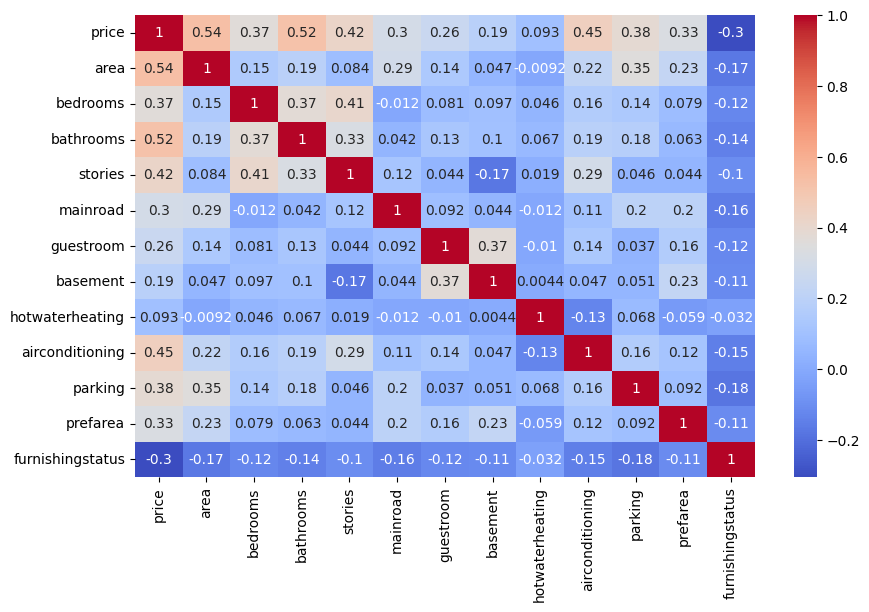

In [ ]:
# Convert categorical columns to numerical values using one-hot encoding or label encoding
# For simplicity, let's use label encoding for any categorical columns
from sklearn.preprocessing import LabelEncoder

# Identify columns with object (string) data type
categorical_columns = df.select_dtypes(include=['object']).columns

# Apply Label Encoding to each categorical column
le = LabelEncoder()
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

# Now, check for missing values and basic statistics again
print(df.isnull().sum())
print(df.describe())

# Recompute the correlation matrix with numerical data
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()



In [ ]:
# Display the column names in the DataFrame to verify
print(df.columns)


Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


In [ ]:

X = df[['area', 'bedrooms', 'stories']]
y = df['price']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)  # Decision Tree model does not require scaling

DecisionTreeRegressor(random_state=42)

In [ ]:
lr_predictions = lr_model.predict(X_test_scaled)
dt_predictions = dt_model.predict(X_test)

In [ ]:
lr_mse = mean_squared_error(y_test, lr_predictions)
dt_mse = mean_squared_error(y_test, dt_predictions)

In [ ]:
print("Linear Regression Mean Squared Error:", lr_mse)
print("Decision Tree Regressor Mean Squared Error:", dt_mse)

Linear Regression Mean Squared Error: 2784597954908.526
Decision Tree Regressor Mean Squared Error: 4040106690652.3955


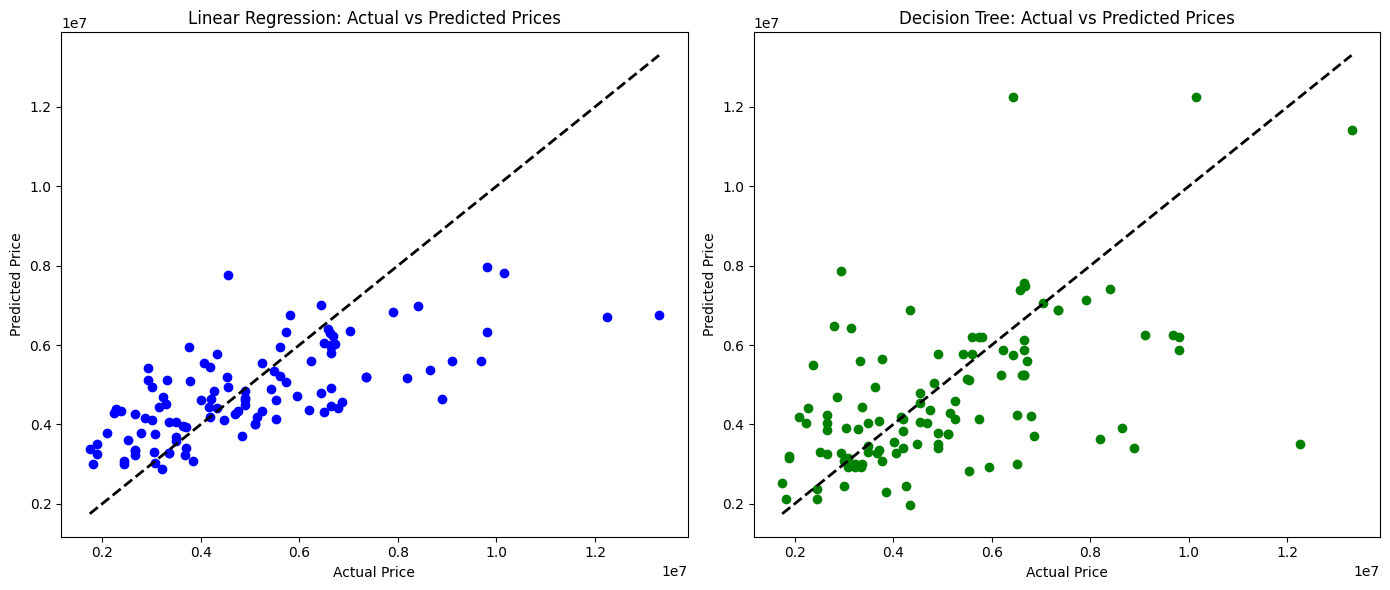

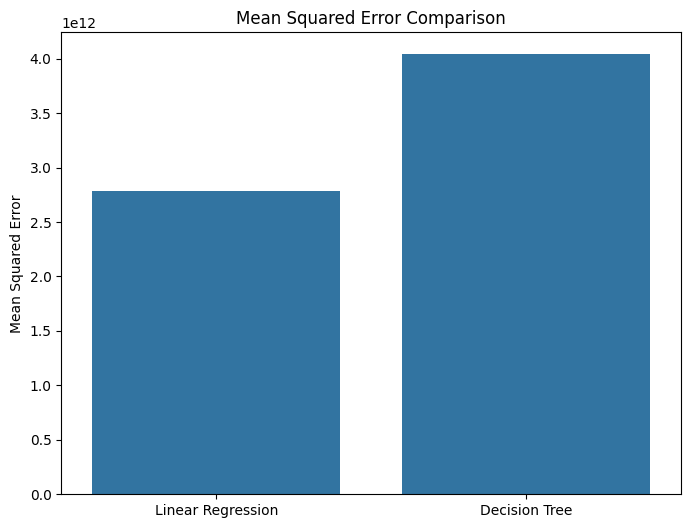

In [ ]:
#graphical Representation

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, lr_predictions, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Linear Regression: Actual vs Predicted Prices')

# Step 8: Visualize the actual vs predicted prices for Decision Tree Regressor
plt.subplot(1, 2, 2)
plt.scatter(y_test, dt_predictions, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Decision Tree: Actual vs Predicted Prices')

plt.tight_layout()
plt.show()

# Step 9: Compare the MSE of both models using a bar plot
mse_values = [lr_mse, dt_mse]
models = ['Linear Regression', 'Decision Tree']

plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=mse_values)
plt.title('Mean Squared Error Comparison')
plt.ylabel('Mean Squared Error')
plt.show()
